## - 불러올 패키지 목록

In [24]:
# 데이터 핸들링을 위한 패키지
import numpy as np
import pandas as pd

# 사이킷런 패키지
from sklearn.preprocessing import *  # 데이터 전처리를 위한 패키지
from sklearn.model_selection import *  # 데이터 분리, 검증 및 파라미터 튜닝을 위한 패키지
from sklearn.metrics import *  # 모델에 대한 다양한 성능 평가를 위한 패키지
from sklearn.cluster import *  # 비지도 군집화 알고리즘 제공
from sklearn.tree import *  # 의사결정나무 알고리즘 제공
from sklearn.ensemble import *  # 앙상블 알고리즘 제공
from sklearn.neighbors import *  # kNN 알고리즘 제공
from sklearn.svm import *  # 서포트 벡터 머신 알고리즘 제공

# 사이파이 패키지
from scipy.cluster.hierarchy import *  # 계층적 군집 분석을 위한 패키지

# label별 데이터 카운트를 위한 모듈
from collections import Counter  # https://docs.python.org/3/library/collections.html

# 경고 메시지 무시
import warnings
warnings.filterwarnings('ignore')

# 시각화를 위한 패키지
import seaborn as sb
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from mlxtend.plotting import plot_decision_regions

%matplotlib inline
# %matplotlib inline 의 목적은 plt.show()함수가 호출되지 않은 경우에도 matplotlib 다이어그램을 렌더링하는 것이다.
# 그러나 현재 업데이트된 버전의 주피터 노트북 버전에서는 %matplotlib inline 를 사용하지 않더라도 Matplotlib 다이어그램을 개체로 표현한다.
# 따라서 굳이 필요하지는 않다. 그러나 코드를 깨끗하게 유지하고 자신이 만든 플롯을 호출하기 위해 여전히 관례적으로 권장된다.

# 그래프 스타일 서식 지정
plt.style.use('default')

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')

# 그래프 축의 음수 표현 오류 방지
plt.rcParams['axes.unicode_minus'] = False

# Dataset 불러오기 및 data 정보 확인

## Dataset 불러오기

In [2]:
df = pd.read_csv('C:\\Users\\Administrator\\GitHub\\TIL\\ADP_study\\rawdata\\online retail.csv')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50,4.15,12680.0,France


## Dataset 정보 확인

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


### 숫자 데이터 컬럼의 통계정보 확인

In [4]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


### 숫자 데이터가 아닌 컬럼의 통계정보 확인

In [5]:
df.describe( exclude = 'number' )

,InvoiceNo,StockCode,Description,InvoiceDate,Country
count,541909,541909,540455,541909,541909
unique,25900,4070,4223,23260,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2011-10-31 14:41,United Kingdom
freq,1114,2313,2369,1114,495478


### 결측치 확인

In [6]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

# Data 전처리

## 결측치 제거

In [7]:
# CustomerID 가 NaN 값인 행 제거

df_retail = df[ df['CustomerID'].notnull() ]

In [8]:
df_retail.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

## 오류값 제거

In [9]:
# Quantity와 UnitPrice에 음수값이 있으므로 이를 제외

df_retail = df_retail[ df_retail['Quantity'] > 0 ]
df_retail = df_retail[ df_retail['UnitPrice'] > 0 ]

## 중요한 데이터만 추리기

In [10]:
# Country 컬럼을 살펴보면 전체 541909건의 데이터 중 495478 건이 United Kingdom 이다.
# United Kingdom 데이터만 추출
df_retail = df_retail[ df_retail['Country'] == 'United Kingdom' ]

In [11]:
df_retail

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31,1.95,15804.0,United Kingdom
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49,2.95,13113.0,United Kingdom
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49,1.25,13113.0,United Kingdom
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49,8.95,13113.0,United Kingdom


# Data 가공

## data type 변환

In [12]:
# CustomerID 의 식별을 원활히 하기 위해 int type 으로 변환
df_retail['CustomerID'] = df_retail['CustomerID'].astype(int)

# InvoiceDate 의 dtype 을 datetime 으로 변환
df_retail['InvoiceDate'] = pd.to_datetime( df_retail['InvoiceDate'] )

## 파생변수 생성

In [13]:
df_retail['sale_amount'] = df_retail['Quantity'] * df_retail['UnitPrice']

In [14]:
df_retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354321 entries, 0 to 541893
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    354321 non-null  object        
 1   StockCode    354321 non-null  object        
 2   Description  354321 non-null  object        
 3   Quantity     354321 non-null  int64         
 4   InvoiceDate  354321 non-null  datetime64[ns]
 5   UnitPrice    354321 non-null  float64       
 6   CustomerID   354321 non-null  int32         
 7   Country      354321 non-null  object        
 8   sale_amount  354321 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1), object(4)
memory usage: 25.7+ MB


In [15]:
df_retail['CustomerID'].value_counts().head(10)

17841    7847
14096    5111
12748    4595
14606    2700
15311    2379
13089    1818
13263    1677
14298    1637
15039    1502
18118    1279
Name: CustomerID, dtype: int64

In [16]:
df_retail.groupby('CustomerID')['sale_amount'].sum().sort_values( ascending = False ).head(10)

CustomerID
18102    259657.30
17450    194550.79
16446    168472.50
17511     91062.38
16029     81024.84
12346     77183.60
16684     66653.56
14096     65164.79
13694     65039.62
15311     60767.90
Name: sale_amount, dtype: float64

## 새로운 분석용 데이터프레임 생성

### 방법(1)

In [17]:
#https://yuddomack.tistory.com/entry/%ED%8C%8C%EC%9D%B4%EC%8D%AC-datetime-%EB%82%A0%EC%A7%9C-%EA%B3%84%EC%82%B0

from datetime import datetime

# 오늘날짜 - 구매일자
df_retail['term'] = datetime.today() - df_retail['InvoiceDate']

# 계산결과는 timedelta 클래스로 반환됨. 일 단위로 변환 수행
df_retail['term'] = df_retail['term'].apply(lambda x: x.days)

# 고객별 최근 구입일에서 현재까지의 기간 ( Recency )
r = df_retail.groupby('CustomerID')['term'].min()  # 가장 최근구매일로부터의 기간이므로 최소값을 구함.
r

CustomerID
12346    3854
12747    3531
12748    3529
12749    3532
12820    3532
         ... 
18280    3806
18281    3709
18282    3536
18283    3532
18287    3571
Name: term, Length: 3920, dtype: int64

In [18]:
# 고객별 주문 건수 ( Frequency )
f = df_retail.groupby('CustomerID')['InvoiceNo'].count()
f

CustomerID
12346       1
12747     103
12748    4595
12749     199
12820      59
         ... 
18280      10
18281       7
18282      12
18283     756
18287      70
Name: InvoiceNo, Length: 3920, dtype: int64

In [19]:
# 고객별 총 주문금액 ( Monetary value )
m = df_retail.groupby('CustomerID')['sale_amount'].sum()
m

CustomerID
12346    77183.60
12747     4196.01
12748    33719.73
12749     4090.88
12820      942.34
           ...   
18280      180.60
18281       80.82
18282      178.05
18283     2094.88
18287     1837.28
Name: sale_amount, Length: 3920, dtype: float64

In [20]:
df_anal = pd.DataFrame( { 'Recency': r,
                          'Frequency': f,
                          'Monetary': m } )
df_anal

,Recency,Frequency,Monetary
CustomerID,,,
12346,3854,1,77183.60
12747,3531,103,4196.01
12748,3529,4595,33719.73
12749,3532,199,4090.88
12820,3532,59,942.34
...,...,...,...
18280,3806,10,180.60
18281,3709,7,80.82
18282,3536,12,178.05


### 방법(2)

# k-means 군집화 조건 설정
- `sklearn.cluster.KMeans()`
- https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [21]:
# 일관된 조건으로 군집화 및 평가를 하기 위해 함수로 정의하여 사용

def kmeans(i):
    cluster_kmeans = KMeans( n_clusters = i,
                             init = 'random',
                             max_iter = 300,
                             random_state = 153 )
    return cluster_kmeans

# 데이터의 분포/왜곡에 대한 조정없이 군집화를 수행할 경우

## 모델 학습에 사용할 x값(예측변수) 설정

In [22]:
x = df_anal[ ['Recency', 'Frequency', 'Monetary'] ]
x

,Recency,Frequency,Monetary
CustomerID,,,
12346,3854,1,77183.60
12747,3531,103,4196.01
12748,3529,4595,33719.73
12749,3532,199,4090.88
12820,3532,59,942.34
...,...,...,...
18280,3806,10,180.60
18281,3709,7,80.82
18282,3536,12,178.05


## k값 선정
- k-means 모델의 결과 중 하나인 inertia 값 활용
- 군집 수에 따른 집단 내 제곱합을 살펴보고, 그래프 기울기가 크게 감소하는 시점의 k값을 선택
- 
- `sklearn.cluster.KMeans()`
- https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

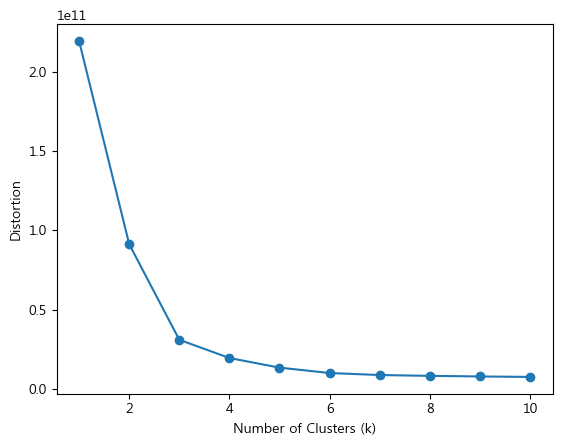

In [25]:
inertia = list()

# k를 1부터 10까지 변화시켜가며 inertia를 측정
for i in range(1,11):
    model = kmeans(i).fit(x)
    inertia.append(model.inertia_)

# k에 따른 inertia의 변화를 확인하여 그래프가 급격히 변하는 지점으로 k값 선정
plt.plot(range(1,11), inertia, '-o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.show()

## k-means 군집화 수행

In [24]:
# k를 3개로 설정하고 군집 모델 학습
model = kmeans(3).fit(x)

# 각각의 클러스터의 중심 확인
centers = model.cluster_centers_
print(centers)

[[3.55590000e+03 1.01966667e+03 4.68758870e+04]
 [3.61728042e+03 8.30872138e+01 1.35822854e+03]
 [3.52766667e+03 2.57000000e+02 2.07560197e+05]]


In [25]:
# 분류된 군집화 값 확인
model.labels_

array([0, 1, 0, ..., 1, 1, 1])

In [26]:
# 새로운 데이터프레임에 cluster에 대한 컬럼 추가하고 군집화 값 입력

df_result = df_anal.copy()

df_result['km_cluster'] = model.labels_

df_result.groupby( ['km_cluster'] ).count()

,Recency,Frequency,Monetary
km_cluster,,,
0,30,30,30
1,3887,3887,3887
2,3,3,3


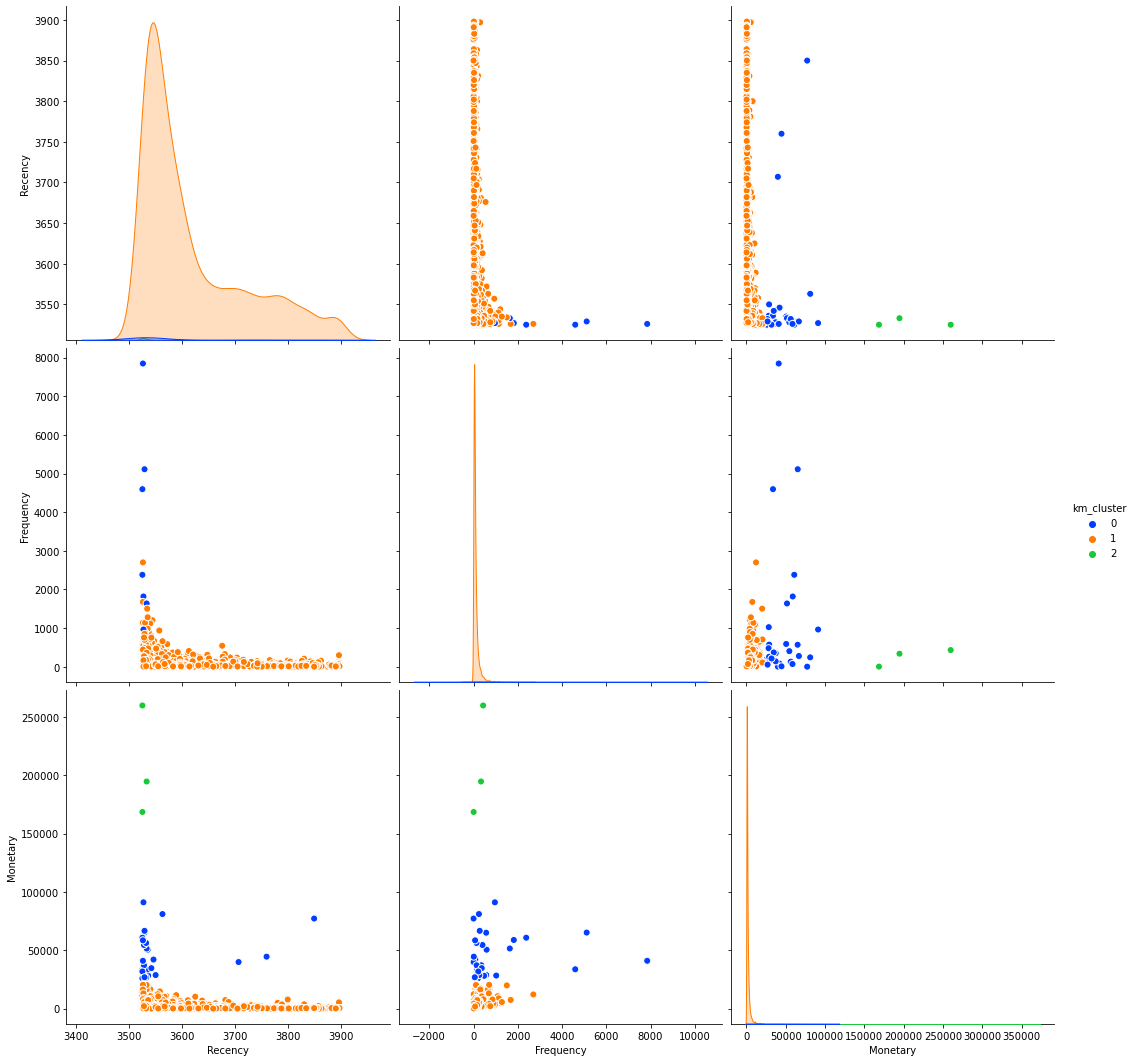

In [27]:
sb.pairplot( df_result,
             hue="km_cluster",
             palette='bright',
             size=5,
             plot_kws=dict(s=50, linewidth=1) )

## 평가

### 전체 데이터의 개별 실루엣 계수 산출
- `sklearn.metrics.silhouette_samples()`
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_samples.html

In [28]:
# 모든 개별 데이터의 실루엣 계수값을 구함. 
score_samples = silhouette_samples( x, model.labels_ )

print('silhouette_samples( ) return 값의 shape' , score_samples.shape)
score_samples

silhouette_samples( ) return 값의 shape (3920,)


array([0.5692218 , 0.92294738, 0.45614089, ..., 0.9734727 , 0.95914239,
       0.9668492 ])

In [29]:
# df_result에 실루엣 계수 컬럼 추가
df_result['silhouette_coeff'] = score_samples
df_result

,Recency,Frequency,Monetary,km_cluster,silhouette_coeff
CustomerID,,,,,
12346,3850,1,77183.60,0,0.569222
12747,3527,103,4196.01,1,0.922947
12748,3525,4595,33719.73,0,0.456141
12749,3528,199,4090.88,1,0.925238
12820,3528,59,942.34,1,0.975742
...,...,...,...,...,...
18280,3802,10,180.60,1,0.973204
18281,3705,7,80.82,1,0.972104
18282,3532,12,178.05,1,0.973473


In [30]:
# 군집별 평균 실루엣 계수
df_result.groupby('km_cluster')['silhouette_coeff'].mean()

km_cluster
0    0.504544
1    0.961261
2    0.613970
Name: silhouette_coeff, dtype: float64

### 평균 실루엣 계수 산출
- `sklearn.metrics.silhouette_score()`
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

In [31]:
# 전체 데이터의 평균 실루엣 계수값을 구함. 
average_score = silhouette_score( x, model.labels_ )

print( 'Silhouette Analysis Score: {0:.4f}'.format(average_score) )

Silhouette Analysis Score: 0.9575


### k값에 따른 군집별 실루엣 계수와 평균 실루엣 계수를 비교

< Average_Silhouette_Score >

k = 2 :  0.9745649615414972
k = 3 :  0.9575002917451106
k = 4 :  0.8386821971419083
k = 5 :  0.7769186026452711
k = 6 :  0.7236215123188868



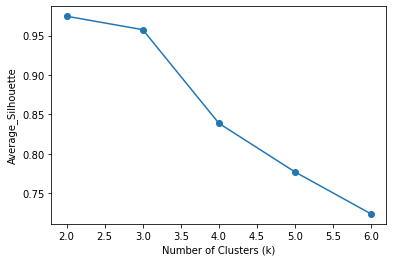

In [32]:
# k를 2부터 6까지 변화시켜가며 평균 실루엣 계수를 측정

avg_silhouette = list()

print('< Average_Silhouette_Score >')
print()

for i in range(2,7):
    model = kmeans(i).fit(x)

    average_score = silhouette_score( x, model.labels_ )
    print( 'k =',i,': ', average_score )

    avg_silhouette.append(average_score)
    
print()

plt.plot(range(2,7), avg_silhouette, '-o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Average_Silhouette')
plt.show()

In [33]:
# 군집별 실루엣 계수와 평균 실루엣 계수를 비교

print('< Average_Silhouette_Score >')
print()

for i in range(2,7):
    model = kmeans(i).fit(x)
    
    score_samples = silhouette_samples( x, model.labels_ )
    average_score = silhouette_score( x, model.labels_ )
    
    df = pd.DataFrame( { 'group' : model.labels_,
                         'Coeff' : score_samples,
                         'Avg' : average_score } )
    
    df['Coeff-avg'] = df['Coeff'] - df['Avg']
    
    display( df.groupby('group')[ ['Coeff','Avg','Coeff-avg'] ].mean() )
    
    print()

< Average_Silhouette_Score >



,Coeff,Avg,Coeff-avg
group,,,
0,0.977116,0.974565,0.002551
1,0.352188,0.974565,-0.622377


,Coeff,Avg,Coeff-avg
group,,,
0,0.613970,0.9575,-0.343530
1,0.961261,0.9575,0.003761
2,0.504544,0.9575,-0.452956


,Coeff,Avg,Coeff-avg
group,,,
0,0.385534,0.838682,-0.453148
1,0.598155,0.838682,-0.240527
2,0.862923,0.838682,0.024241
3,0.502042,0.838682,-0.336640


,Coeff,Avg,Coeff-avg
group,,,
0,0.428137,0.776919,-0.348782
1,0.584642,0.776919,-0.192276
2,0.816849,0.776919,0.039931
3,0.388208,0.776919,-0.388711
4,0.566847,0.776919,-0.210071


,Coeff,Avg,Coeff-avg
group,,,
0,0.522349,0.723622,-0.201272
1,0.610019,0.723622,-0.113603
2,0.459547,0.723622,-0.264074
3,0.562107,0.723622,-0.161515
4,0.459100,0.723622,-0.264521
5,0.777625,0.723622,0.054004


# 데이터의 평균 및 표준편차 재조정 후 군집화 수행
- `sklearn.cluster.KMeans()`
- https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

## 데이터의 분포/왜곡 확인

In [34]:
df_anal.describe()

,Recency,Frequency,Monetary
count,3920.000000,3920.000000,3920.000000
mean,3616.742092,90.388010,1864.385601
std,99.533485,217.808385,7482.817477
min,3525.000000,1.000000,3.750000
25%,3542.000000,17.000000,300.280000
50%,3575.000000,41.000000,652.280000
75%,3667.000000,99.250000,1576.585000
max,3898.000000,7847.000000,259657.300000


(array([3.887e+03, 1.900e+01, 9.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([3.75000000e+00, 2.59691050e+04, 5.19344600e+04, 7.78998150e+04,
        1.03865170e+05, 1.29830525e+05, 1.55795880e+05, 1.81761235e+05,
        2.07726590e+05, 2.33691945e+05, 2.59657300e+05]),
 <BarContainer object of 10 artists>)

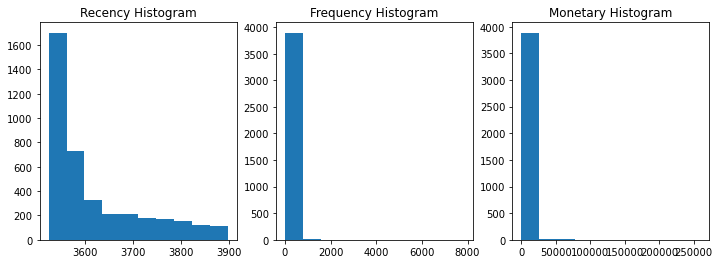

In [35]:
fig, (ax1,ax2,ax3) = plt.subplots(figsize=(12,4), nrows=1, ncols=3)

ax1.set_title('Recency Histogram')
ax1.hist(df_anal['Recency'])

ax2.set_title('Frequency Histogram')
ax2.hist(df_anal['Frequency'])

ax3.set_title('Monetary Histogram')
ax3.hist(df_anal['Monetary'])

## 평균과 표준편차를 재조정
- `sklearn.preprocessing.StandardScaler()`
- https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [36]:
x = df_anal[ ['Recency', 'Frequency', 'Monetary'] ]

x_scaled = StandardScaler().fit_transform(x)
x_scaled

array([[ 2.34381090e+00, -4.10449826e-01,  1.00669064e+01],
       [-9.01742172e-01,  5.79114471e-02,  3.11636875e-01],
       [-9.21838476e-01,  2.06841746e+01,  4.25767546e+00],
       ...,
       [-8.51501413e-01, -3.59940277e-01, -2.25389800e-01],
       [-8.91694020e-01,  3.05634195e+00,  3.08070865e-02],
       [-4.99816095e-01, -9.36172002e-02, -3.62284108e-03]])

In [37]:
df_anal_scaled = pd.DataFrame( { 'Recency_scaled' : x_scaled[:,0],
                                 'Frequency_scaled' : x_scaled[:,1],
                                 'Monetary_scaled' : x_scaled[:,2] } )

df_anal_scaled

,Recency_scaled,Frequency_scaled,Monetary_scaled
0,2.343811,-0.410450,10.066906
1,-0.901742,0.057911,0.311637
2,-0.921838,20.684175,4.257675
3,-0.891694,0.498722,0.297586
4,-0.891694,-0.144127,-0.123237
...,...,...,...
3915,1.861500,-0.369124,-0.225049
3916,0.886829,-0.382899,-0.238385
3917,-0.851501,-0.359940,-0.225390
3918,-0.891694,3.056342,0.030807


In [38]:
df_anal_scaled.describe()

,Recency_scaled,Frequency_scaled,Monetary_scaled
count,3.920000e+03,3.920000e+03,3.920000e+03
mean,-5.355410e-16,-1.125446e-17,2.451901e-17
std,1.000128e+00,1.000128e+00,1.000128e+00
min,-9.218385e-01,-4.104498e-01,-2.486861e-01
25%,-7.510199e-01,-3.369814e-01,-2.090530e-01
50%,-4.194309e-01,-2.267787e-01,-1.620059e-01
75%,5.049991e-01,4.069228e-02,-3.846644e-02
max,2.826122e+00,3.561663e+01,3.445571e+01


(array([3.887e+03, 1.900e+01, 9.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([-0.24868614,  3.22175366,  6.69219345, 10.16263324, 13.63307304,
        17.10351283, 20.57395263, 24.04439242, 27.51483221, 30.98527201,
        34.4557118 ]),
 <BarContainer object of 10 artists>)

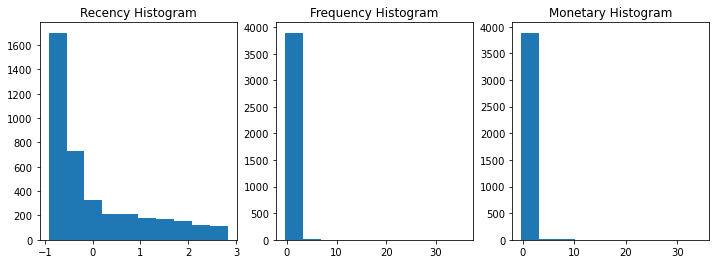

In [39]:
fig, (ax1,ax2,ax3) = plt.subplots(figsize=(12,4), nrows=1, ncols=3)

ax1.set_title('Recency Histogram')
ax1.hist(df_anal_scaled['Recency_scaled'])

ax2.set_title('Frequency Histogram')
ax2.hist(df_anal_scaled['Frequency_scaled'])

ax3.set_title('Monetary Histogram')
ax3.hist(df_anal_scaled['Monetary_scaled'])

## 모델 학습에 사용할 x값(예측변수) 설정

In [40]:
x2 = df_anal_scaled[ ['Recency_scaled', 'Frequency_scaled', 'Monetary_scaled'] ]
x2

,Recency_scaled,Frequency_scaled,Monetary_scaled
0,2.343811,-0.410450,10.066906
1,-0.901742,0.057911,0.311637
2,-0.921838,20.684175,4.257675
3,-0.891694,0.498722,0.297586
4,-0.891694,-0.144127,-0.123237
...,...,...,...
3915,1.861500,-0.369124,-0.225049
3916,0.886829,-0.382899,-0.238385
3917,-0.851501,-0.359940,-0.225390
3918,-0.891694,3.056342,0.030807


## k값 선정
- k-means 모델의 결과 중 하나인 inertia 값 활용
- 군집 수에 따른 집단 내 제곱합을 살펴보고, 그래프 기울기가 크게 감소하는 시점의 k값을 선택
- 
- `sklearn.cluster.KMeans()`
- https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

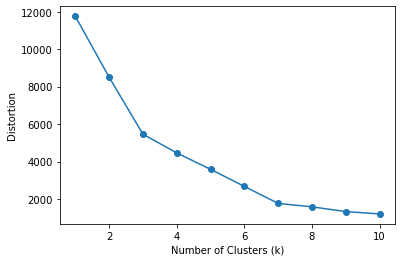

In [41]:
inertia = list()

# k를 1부터 10까지 변화시켜가며 inertia를 측정
for i in range(1,11):
    model = kmeans(i).fit(x2)
    inertia.append(model.inertia_)

# k에 따른 inertia의 변화를 확인하여 그래프가 급격히 변하는 지점으로 k값 선정
plt.plot(range(1,11), inertia, '-o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.show()

## k-means 군집화 수행

In [42]:
# k를 3개로 설정하고 군집 모델 학습
model = kmeans(3).fit(x2)

# 각각의 클러스터의 중심 확인
centers = model.cluster_centers_
print(centers)

[[-5.13356865e-01  5.34139246e-02  2.15878800e-03]
 [-6.56567265e-01  8.43453752e+00  1.15731655e+01]
 [ 1.53807599e+00 -2.87827866e-01 -1.83205315e-01]]


In [43]:
# 분류된 군집화 값 확인
model.labels_

array([1, 0, 1, ..., 0, 0, 0])

In [44]:
# 새로운 데이터프레임에 cluster에 대한 컬럼 추가하고 군집화 값 입력

df_result_2 = df_anal_scaled.copy()

df_result_2['km_cluster'] = model.labels_

df_result_2.groupby( ['km_cluster'] ).count()

,Recency_scaled,Frequency_scaled,Monetary_scaled
km_cluster,,,
0,2923,2923,2923
1,15,15,15
2,982,982,982


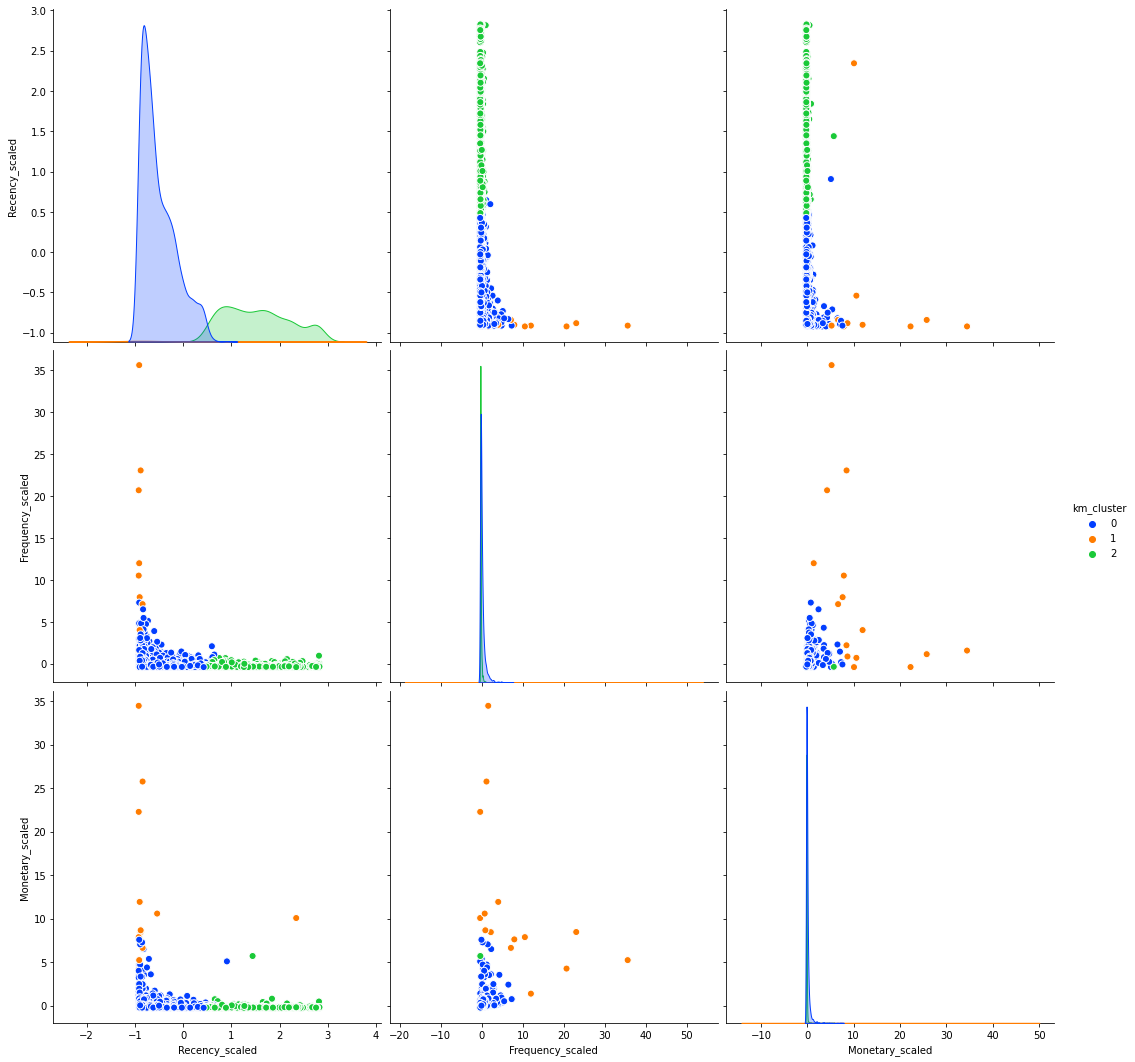

In [45]:
sb.pairplot( df_result_2,
             hue="km_cluster",
             palette='bright',
             size=5,
             plot_kws=dict(s=50, linewidth=1) )

## 평가

### 전체 데이터의 개별 실루엣 계수 산출
- `sklearn.metrics.silhouette_samples()`
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_samples.html

In [46]:
# 모든 개별 데이터의 실루엣 계수값을 구함. 
score_samples = silhouette_samples( x2, model.labels_ )

print('silhouette_samples( ) return 값의 shape' , score_samples.shape)
score_samples

silhouette_samples( ) return 값의 shape (3920,)


array([-0.27168993,  0.67218748,  0.11896745, ...,  0.68534598,
        0.25686379,  0.70736686])

In [47]:
# df_result_2에 실루엣 계수 컬럼 추가
df_result_2['silhouette_coeff'] = score_samples
df_result_2

,Recency_scaled,Frequency_scaled,Monetary_scaled,km_cluster,silhouette_coeff
0,2.343811,-0.410450,10.066906,1,-0.271690
1,-0.901742,0.057911,0.311637,0,0.672187
2,-0.921838,20.684175,4.257675,1,0.118967
3,-0.891694,0.498722,0.297586,0,0.634011
4,-0.891694,-0.144127,-0.123237,0,0.713307
...,...,...,...,...,...
3915,1.861500,-0.369124,-0.225049,2,0.732547
3916,0.886829,-0.382899,-0.238385,2,0.509514
3917,-0.851501,-0.359940,-0.225390,0,0.685346
3918,-0.891694,3.056342,0.030807,0,0.256864


In [48]:
# 군집별 평균 실루엣 계수
df_result_2.groupby('km_cluster')['silhouette_coeff'].mean()

km_cluster
0    0.594573
1   -0.026296
2    0.595258
Name: silhouette_coeff, dtype: float64

### 평균 실루엣 계수 산출
- `sklearn.metrics.silhouette_score()`
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

In [49]:
# 전체 데이터의 평균 실루엣 계수값을 구함. 
average_score = silhouette_score( x2, model.labels_ )

print( 'Silhouette Analysis Score: {0:.4f}'.format(average_score) )

Silhouette Analysis Score: 0.5924


### k값에 따른 군집별 실루엣 계수와 평균 실루엣 계수를 비교

< Average_Silhouette_Score >

k = 2 :  0.5667257984585801
k = 3 :  0.5923691942714455
k = 4 :  0.6112840954318207
k = 5 :  0.4388936399696993
k = 6 :  0.514217028201228



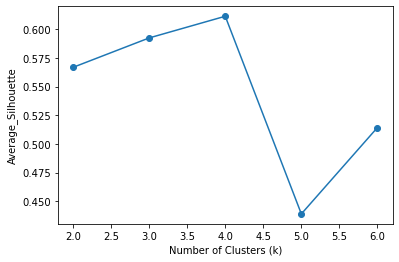

In [50]:
# k를 2부터 6까지 변화시켜가며 평균 실루엣 계수를 측정

avg_silhouette = list()

print('< Average_Silhouette_Score >')
print()

for i in range(2,7):
    model = kmeans(i).fit(x2)

    average_score = silhouette_score( x2, model.labels_ )
    print( 'k =',i,': ', average_score )

    avg_silhouette.append(average_score)
    
print()

plt.plot(range(2,7), avg_silhouette, '-o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Average_Silhouette')
plt.show()

In [51]:
# 군집별 실루엣 계수와 평균 실루엣 계수를 비교

print('< Average_Silhouette_Score >')
print()

for i in range(2,7):
    model = kmeans(i).fit(x2)
    
    score_samples = silhouette_samples( x2, model.labels_ )
    average_score = silhouette_score( x2, model.labels_ )
    
    df = pd.DataFrame( { 'group' : model.labels_,
                         'Coeff' : score_samples,
                         'Avg' : average_score } )
    
    df['Coeff-avg'] = df['Coeff'] - df['Avg']
    
    display( df.groupby('group')[ ['Coeff','Avg','Coeff-avg'] ].mean() )
    
    print()

< Average_Silhouette_Score >



,Coeff,Avg,Coeff-avg
group,,,
0,0.555007,0.566726,-0.011719
1,0.601177,0.566726,0.034451


,Coeff,Avg,Coeff-avg
group,,,
0,-0.026296,0.592369,-0.618665
1,0.595258,0.592369,0.002889
2,0.594573,0.592369,0.002204


,Coeff,Avg,Coeff-avg
group,,,
0,0.094280,0.611284,-0.517005
1,-0.037002,0.611284,-0.648287
2,0.665663,0.611284,0.054379
3,0.581740,0.611284,-0.029544


,Coeff,Avg,Coeff-avg
group,,,
0,0.335243,0.438894,-0.103651
1,0.161990,0.438894,-0.276904
2,0.407259,0.438894,-0.031635
3,0.434626,0.438894,-0.004268
4,0.595002,0.438894,0.156108


,Coeff,Avg,Coeff-avg
group,,,
0,0.181194,0.514217,-0.333023
1,0.111059,0.514217,-0.403158
2,0.557879,0.514217,0.043662
3,0.457248,0.514217,-0.056969
4,0.572656,0.514217,0.058439
5,0.207223,0.514217,-0.306994


# 전체 데이터를 로그변환 후 군집화 수행

## 데이터의 로그변환 수행

In [52]:
# Recency, Frequecny, Monetary 데이터에 np.log1p() 로 Log Transformation
df_anal_log = pd.DataFrame( { 'Recency_log' : np.log1p(df_anal['Recency']),
                              'Frequency_log' : np.log1p(df_anal['Frequency']),
                              'Monetary_log' : np.log1p(df_anal['Monetary']) } )

df_anal_log

,Recency_log,Frequency_log,Monetary_log
CustomerID,,,
12346,8.256088,0.693147,11.253955
12747,8.168486,4.644391,8.342128
12748,8.167919,8.432942,10.425868
12749,8.168770,5.298317,8.316760
12820,8.168770,4.094345,6.849427
...,...,...,...
18280,8.243546,2.397895,5.201806
18281,8.217708,2.079442,4.404522
18282,8.169903,2.564949,5.187665


## 로그변환된 데이터에 StandardScaler 적용

In [53]:
# Log Transformation 데이터에 StandardScaler 적용
x_log_scaled = StandardScaler().fit_transform(df_anal_log)
x_log_scaled

array([[ 2.32245051, -2.40338709,  3.78591383],
       [-0.9144796 ,  0.73257781,  1.44428   ],
       [-0.93543255,  3.73941895,  3.1199826 ],
       ...,
       [-0.86214913, -0.91780272, -1.09247605],
       [-0.90400757,  2.30798143,  0.88585825],
       [-0.49789646,  0.42962703,  0.78039553]])

In [54]:
# df_anal_log 데이터프레임에 log변환과 scale변환이 진행된 값을 입력

df_anal_log['Recency_log'] = x_log_scaled[:,0]
df_anal_log['Frequency_log'] = x_log_scaled[:,1]
df_anal_log['Monetary_log'] = x_log_scaled[:,2]

df_anal_log

,Recency_log,Frequency_log,Monetary_log
CustomerID,,,
12346,2.322451,-2.403387,3.785914
12747,-0.914480,0.732578,1.444280
12748,-0.935433,3.739419,3.119983
12749,-0.904008,1.251577,1.423880
12820,-0.904008,0.296025,0.243880
...,...,...,...
18280,1.858994,-1.050388,-1.081104
18281,0.904299,-1.303133,-1.722264
18282,-0.862149,-0.917803,-1.092476


In [55]:
df_anal_log.describe()

,Recency_log,Frequency_log,Monetary_log
count,3.920000e+03,3.920000e+03,3.920000e+03
mean,-1.461354e-14,2.684927e-17,-3.663170e-16
std,1.000128e+00,1.000128e+00,1.000128e+00
min,-9.354325e-01,-2.403387e+00,-4.011264e+00
25%,-7.577100e-01,-6.595263e-01,-6.740009e-01
50%,-4.151405e-01,1.294462e-02,-5.159317e-02
75%,5.234658e-01,7.034240e-01,6.574079e-01
max,2.780166e+00,4.164087e+00,4.761518e+00


(array([   4.,   26.,  242., 1029., 1288.,  923.,  323.,   59.,   22.,
           4.]),
 array([-4.01126423, -3.13398598, -2.25670773, -1.37942948, -0.50215123,
         0.37512702,  1.25240527,  2.12968352,  3.00696177,  3.88424002,
         4.76151827]),
 <BarContainer object of 10 artists>)

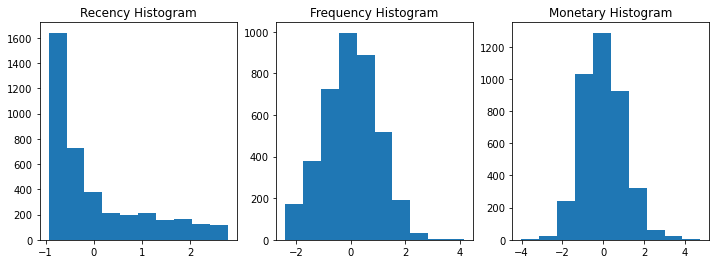

In [56]:
fig, (ax1,ax2,ax3) = plt.subplots(figsize=(12,4), nrows=1, ncols=3)

ax1.set_title('Recency Histogram')
ax1.hist(df_anal_log['Recency_log'])

ax2.set_title('Frequency Histogram')
ax2.hist(df_anal_log['Frequency_log'])

ax3.set_title('Monetary Histogram')
ax3.hist(df_anal_log['Monetary_log'])

## 모델 학습에 사용할 x값(예측변수) 설정

In [57]:
x3 = df_anal_log[ ['Recency_log', 'Frequency_log', 'Monetary_log'] ]
x3

,Recency_log,Frequency_log,Monetary_log
CustomerID,,,
12346,2.322451,-2.403387,3.785914
12747,-0.914480,0.732578,1.444280
12748,-0.935433,3.739419,3.119983
12749,-0.904008,1.251577,1.423880
12820,-0.904008,0.296025,0.243880
...,...,...,...
18280,1.858994,-1.050388,-1.081104
18281,0.904299,-1.303133,-1.722264
18282,-0.862149,-0.917803,-1.092476


## k값 선정
- k-means 모델의 결과 중 하나인 inertia 값 활용
- 군집 수에 따른 집단 내 제곱합을 살펴보고, 그래프 기울기가 크게 감소하는 시점의 k값을 선택
- 
- `sklearn.cluster.KMeans()`
- https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

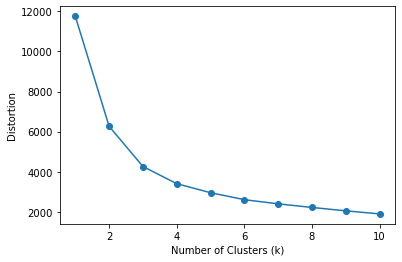

In [58]:
inertia = list()

# k를 1부터 10까지 변화시켜가며 inertia를 측정
for i in range(1,11):
    model = kmeans(i).fit(x3)
    inertia.append(model.inertia_)

# k에 따른 inertia의 변화를 확인하여 그래프가 급격히 변하는 지점으로 k값 선정
plt.plot(range(1,11), inertia, '-o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.show()

## k-means 군집화 수행

In [59]:
# k를 3개로 설정하고 군집 모델 학습
model = kmeans(3).fit(x3)

# 각각의 클러스터의 중심 확인
centers = model.cluster_centers_
print(centers)

[[-0.35986305 -0.45873178 -0.46401067]
 [-0.57467463  0.95038889  0.95003076]
 [ 1.62412466 -0.81361831 -0.80362597]]


In [60]:
# 분류된 군집화 값 확인
model.labels_

array([2, 1, 1, ..., 0, 1, 1])

In [61]:
# 새로운 데이터프레임에 cluster에 대한 컬럼 추가하고 군집화 값 입력

df_result_3 = df_anal_log.copy()

df_result_3['km_cluster'] = model.labels_

df_result_3.groupby( ['km_cluster'] ).count()

,Recency_log,Frequency_log,Monetary_log
km_cluster,,,
0,1551,1551,1551
1,1496,1496,1496
2,873,873,873


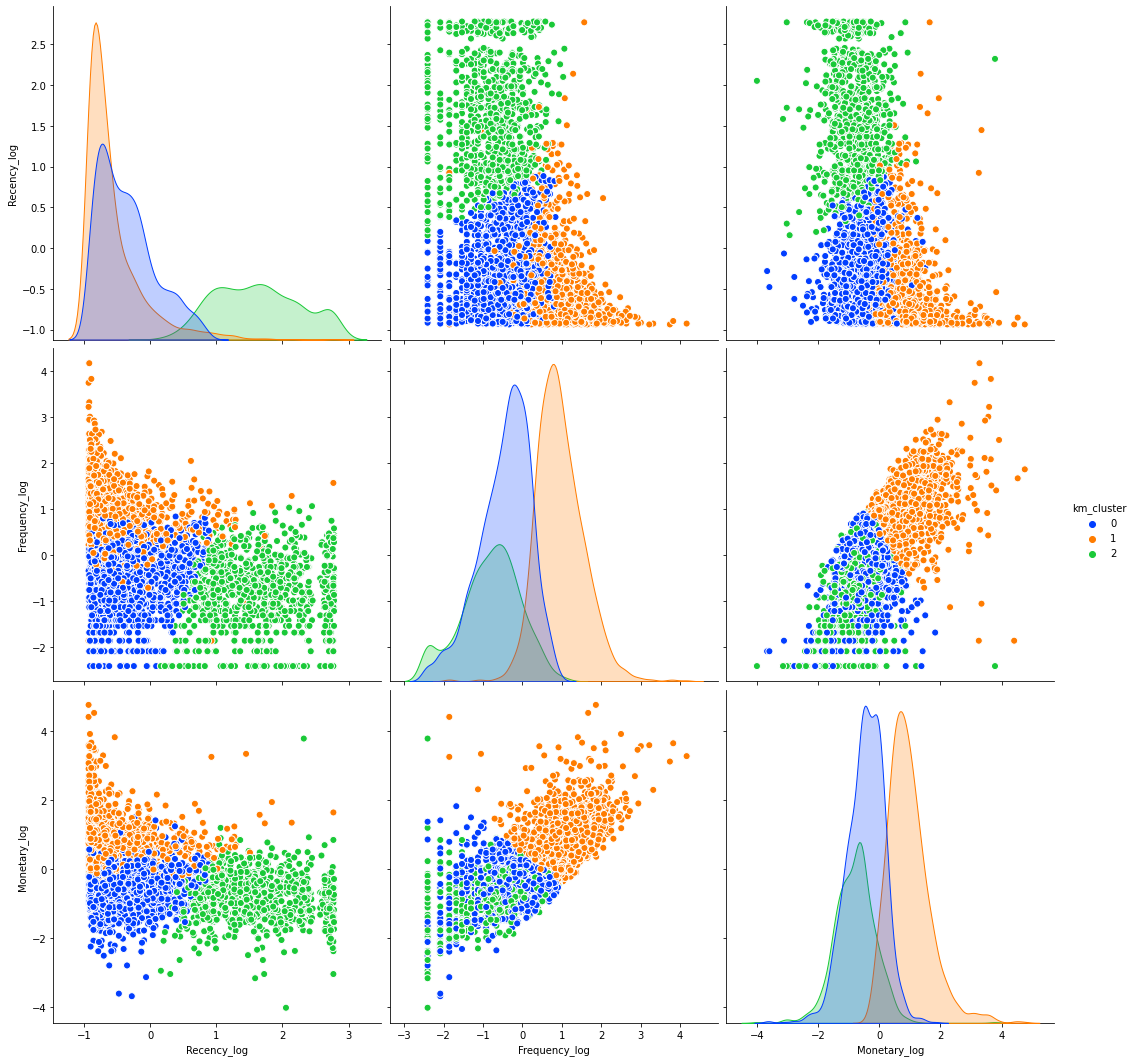

In [62]:
sb.pairplot( df_result_3,
             hue="km_cluster",
             palette='bright',
             size=5,
             plot_kws=dict(s=50, linewidth=1) )

## 평가

### 전체 데이터의 개별 실루엣 계수 산출
- `sklearn.metrics.silhouette_samples()`
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_samples.html

In [63]:
# 모든 개별 데이터의 실루엣 계수값을 구함. 
score_samples = silhouette_samples( x3, model.labels_ )

print('silhouette_samples( ) return 값의 shape' , score_samples.shape)
score_samples

silhouette_samples( ) return 값의 shape (3920,)


array([0.05899589, 0.54924395, 0.35203196, ..., 0.53318088, 0.48895029,
       0.419687  ])

In [64]:
# df_result_2에 실루엣 계수 컬럼 추가
df_result_3['silhouette_coeff'] = score_samples
df_result_3

,Recency_log,Frequency_log,Monetary_log,km_cluster,silhouette_coeff
CustomerID,,,,,
12346,2.322451,-2.403387,3.785914,2,0.058996
12747,-0.914480,0.732578,1.444280,1,0.549244
12748,-0.935433,3.739419,3.119983,1,0.352032
12749,-0.904008,1.251577,1.423880,1,0.599517
12820,-0.904008,0.296025,0.243880,1,0.101895
...,...,...,...,...,...
18280,1.858994,-1.050388,-1.081104,2,0.548791
18281,0.904299,-1.303133,-1.722264,2,0.250964
18282,-0.862149,-0.917803,-1.092476,0,0.533181


In [65]:
# 군집별 평균 실루엣 계수
df_result_3.groupby('km_cluster')['silhouette_coeff'].mean()

km_cluster
0    0.354401
1    0.419107
2    0.361012
Name: silhouette_coeff, dtype: float64

### 평균 실루엣 계수 산출
- `sklearn.metrics.silhouette_score()`
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

In [66]:
# 전체 데이터의 평균 실루엣 계수값을 구함. 
average_score = silhouette_score( x3, model.labels_ )

print( 'Silhouette Analysis Score: {0:.4f}'.format(average_score) )

Silhouette Analysis Score: 0.3806


### k값에 따른 군집별 실루엣 계수와 평균 실루엣 계수를 비교

< Average_Silhouette_Score >

k = 2 :  0.4005497283105507
k = 3 :  0.3805674501999667
k = 4 :  0.33512997695115965
k = 5 :  0.3249114792288572
k = 6 :  0.28806670947620155



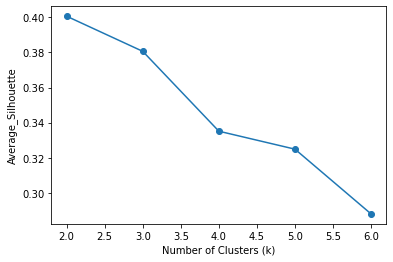

In [67]:
# k를 2부터 6까지 변화시켜가며 평균 실루엣 계수를 측정

avg_silhouette = list()

print('< Average_Silhouette_Score >')
print()

for i in range(2,7):
    model = kmeans(i).fit(x3)

    average_score = silhouette_score( x3, model.labels_ )
    print( 'k =',i,': ', average_score )

    avg_silhouette.append(average_score)
    
print()

plt.plot(range(2,7), avg_silhouette, '-o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Average_Silhouette')
plt.show()

In [68]:
# 군집별 실루엣 계수와 평균 실루엣 계수를 비교

print('< Average_Silhouette_Score >')
print()

for i in range(2,7):
    model = kmeans(i).fit(x3)
    
    score_samples = silhouette_samples( x3, model.labels_ )
    average_score = silhouette_score( x3, model.labels_ )
    
    df = pd.DataFrame( { 'group' : model.labels_,
                         'Coeff' : score_samples,
                         'Avg' : average_score } )
    
    df['Coeff-avg'] = df['Coeff'] - df['Avg']
    
    display( df.groupby('group')[ ['Coeff','Avg','Coeff-avg'] ].mean() )
    
    print()

< Average_Silhouette_Score >



,Coeff,Avg,Coeff-avg
group,,,
0,0.305446,0.40055,-0.095104
1,0.483737,0.40055,0.083188


,Coeff,Avg,Coeff-avg
group,,,
0,0.354401,0.380567,-0.026166
1,0.419107,0.380567,0.038540
2,0.361012,0.380567,-0.019555


,Coeff,Avg,Coeff-avg
group,,,
0,0.352058,0.33513,0.016928
1,0.315644,0.33513,-0.019486
2,0.311682,0.33513,-0.023448
3,0.376672,0.33513,0.041542


,Coeff,Avg,Coeff-avg
group,,,
0,0.318862,0.324911,-0.006049
1,0.340650,0.324911,0.015739
2,0.284071,0.324911,-0.040840
3,0.254947,0.324911,-0.069965
4,0.372936,0.324911,0.048025


,Coeff,Avg,Coeff-avg
group,,,
0,0.253331,0.288067,-0.034736
1,0.308369,0.288067,0.020303
2,0.284829,0.288067,-0.003238
3,0.332333,0.288067,0.044267
4,0.286345,0.288067,-0.001721
5,0.253723,0.288067,-0.034344


## 평가 결과 반영하여 k값 조정 후 군집화 수행

In [69]:
# k를 2개로 설정하고 군집 모델 학습
model = kmeans(2).fit(x3)

# 각각의 클러스터의 중심 확인
centers = model.cluster_centers_
print(centers)

[[ 0.63578076 -0.78129691 -0.76453635]
 [-0.55725925  0.68480356  0.670113  ]]


In [70]:
# 분류된 군집화 값 확인
model.labels_

array([0, 1, 1, ..., 0, 1, 1])

In [71]:
# 새로운 데이터프레임에 cluster에 대한 컬럼 추가하고 군집화 값 입력

df_result_3 = df_anal_log.copy()

df_result_3['km_cluster'] = model.labels_

df_result_3.groupby( ['km_cluster'] ).count()

,Recency_log,Frequency_log,Monetary_log
km_cluster,,,
0,1829,1829,1829
1,2091,2091,2091


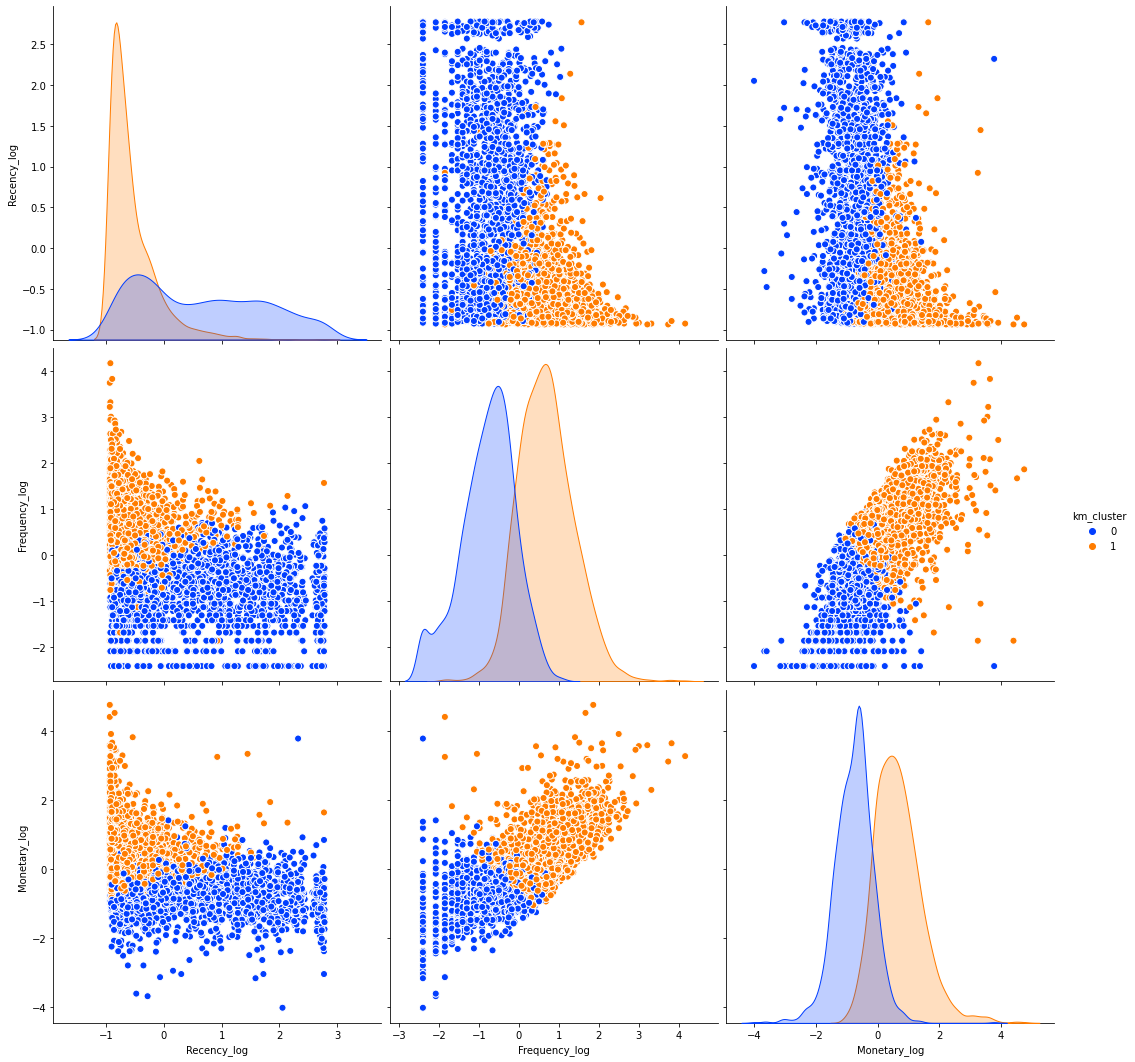

In [72]:
sb.pairplot( df_result_3,
             hue="km_cluster",
             palette='bright',
             size=5,
             plot_kws=dict(s=50, linewidth=1) )

# Mean Shift

# GMM (Gaussian Mixture Model)

# DBSCAN